# Python Project Temnplate

## 1. Prepare Problem

### a) Load Libraries

In [15]:
import numpy as np
from matplotlib import pyplot
from matplotlib import figure
from pandas import read_csv
import pandas as pd
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

### b) Load dataset

In [6]:
dataset = read_csv("sonar.all-data.csv")

## 2. Summarize Data

### a) Descriptive Statistics

In [8]:
dataset.shape

(207, 61)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
0.0200    207 non-null float64
0.0371    207 non-null float64
0.0428    207 non-null float64
0.0207    207 non-null float64
0.0954    207 non-null float64
0.0986    207 non-null float64
0.1539    207 non-null float64
0.1601    207 non-null float64
0.3109    207 non-null float64
0.2111    207 non-null float64
0.1609    207 non-null float64
0.1582    207 non-null float64
0.2238    207 non-null float64
0.0645    207 non-null float64
0.0660    207 non-null float64
0.2273    207 non-null float64
0.3100    207 non-null float64
0.2999    207 non-null float64
0.5078    207 non-null float64
0.4797    207 non-null float64
0.5783    207 non-null float64
0.5071    207 non-null float64
0.4328    207 non-null float64
0.5550    207 non-null float64
0.6711    207 non-null float64
0.6415    207 non-null float64
0.7104    207 non-null float64
0.8080    207 non-null float64
0.6791    207 non-null floa

In [10]:
dataset.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [11]:
dataset.describe()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,0.029208,0.038443,0.043837,0.054053,0.075105,0.104599,0.121591,0.134677,0.177361,0.208245,...,0.016034,0.013472,0.010729,0.010917,0.009300,0.008181,0.007771,0.007947,0.007936,0.006523
std,0.023038,0.033040,0.038521,0.046583,0.055669,0.059247,0.061897,0.085340,0.118311,0.134741,...,0.012027,0.009628,0.007071,0.007310,0.007103,0.005719,0.005756,0.006485,0.006196,0.005038
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013300,0.016400,0.018900,0.024450,0.037700,0.066950,0.080600,0.080350,0.096750,0.111150,...,0.008350,0.007350,0.005050,0.005350,0.004100,0.004400,0.003700,0.003600,0.003650,0.003100
50%,0.022800,0.030800,0.034200,0.044100,0.062000,0.092100,0.105600,0.111900,0.152200,0.181000,...,0.013800,0.011500,0.009600,0.009300,0.007500,0.006800,0.005900,0.005800,0.006300,0.005300
75%,0.035800,0.048100,0.058200,0.065700,0.101050,0.134150,0.153050,0.169800,0.231500,0.269000,...,0.020700,0.016750,0.014900,0.014450,0.012100,0.010350,0.010350,0.010400,0.010350,0.008550
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [13]:
dataset.groupby("R").size()

R
M    111
R     96
dtype: int64

### b) Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002624F008F28>,
      dtype=object)

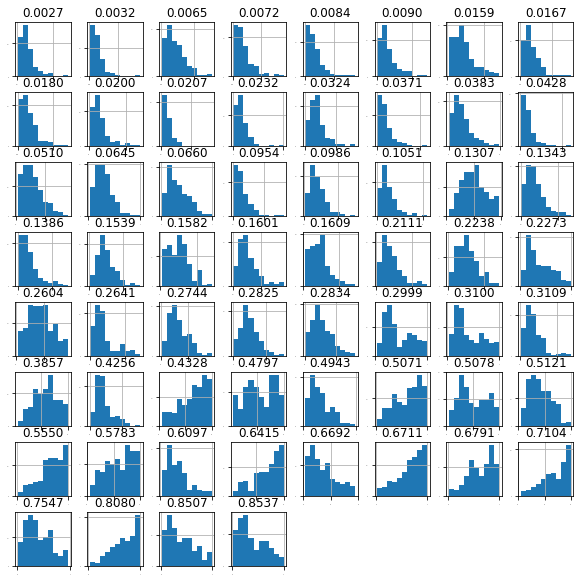

In [46]:
dataset.hist(sharex=False, xlabelsize=1, ylabelsize=1, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002624FB8F080>,
      dtype=object)

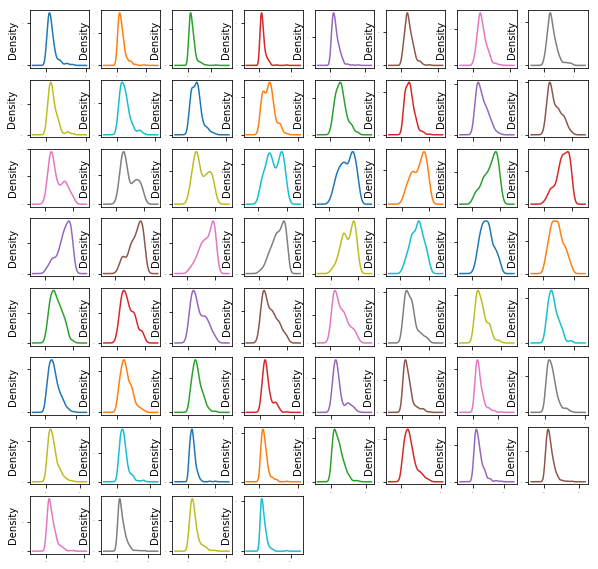

In [47]:
dataset.plot(kind="density", subplots=True, layout=(8,8), sharex=False, legend=False, fontsize=1, figsize=(10,10))

0.0200      AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
0.0371    AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
0.0428    AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
0.0207    AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
0.0954    AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
0.0986    AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
0.1539    AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
0.1601    AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
0.3109      AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
0.2111    AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
0.1609    AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
0.1582    AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
0.2238    AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
0.0645    AxesSubplot(0.619681,0.703298;0.0824468x0.0803...
0.0660    AxesSubplot(0.718617,0.703298;0.0824468x0.0803...
0.2273    AxesSubplot(0.817553,0.703298;0.0824468x0.0803...
0.3100      AxesSubplot(0.125,0.606915;0

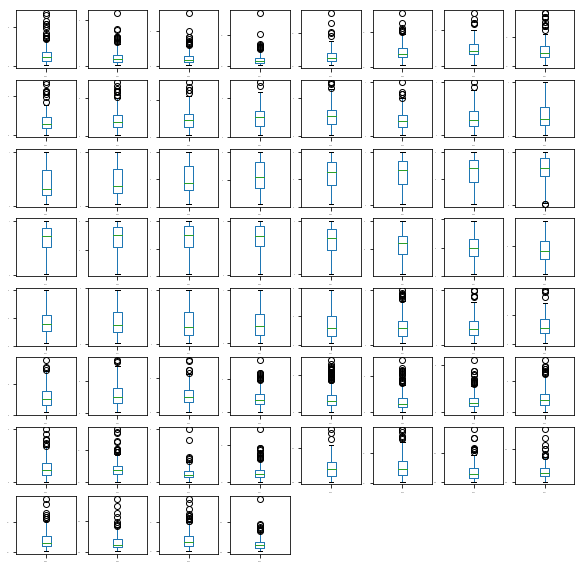

In [48]:
dataset.plot(kind="box",subplots=True, layout=(8,8), sharex=False, sharey=False, fontsize=1, figsize=(10,10))

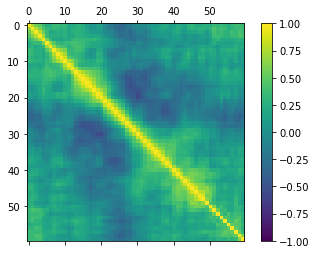

In [22]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataset.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

## 3. Evaluate Algorithms

### a) Split-out validation dataset

In [23]:
array = dataset.values
X = array[:,:60].astype(float)
y = array[:,60]
validation_size = 0.2
seed = 7
X_train, X_validation, y_train, y_validation = train_test_split(X, y,
test_size=validation_size, random_state=seed)

### b) Test Options and Evaluation Metric

In [24]:
num_folds = 10
seed = 7
scoring = "accuracy"

### c) Spot Check Algorithms

In [26]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.757721 (0.065198)
LDA: 0.701838 (0.086338)
KNN: 0.756618 (0.111644)
CART: 0.708456 (0.104078)
NB: 0.700368 (0.132161)
SVM: 0.547059 (0.106399)


### d) Compare Algorithms

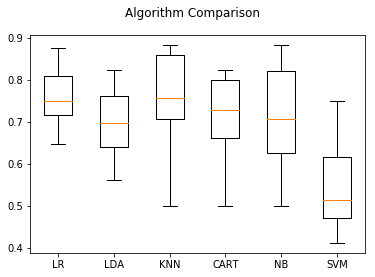

In [28]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### e) Evaluate Algorithms: Standardize Data

In [31]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.739338 (0.085535)
ScaledLDA: 0.701838 (0.086338)
ScaledKNN: 0.775368 (0.092709)
ScaledCART: 0.751471 (0.094195)
ScaledNB: 0.700368 (0.132161)
ScaledSVM: 0.824632 (0.067452)


### e) Compare Algorithms with Standardize Data

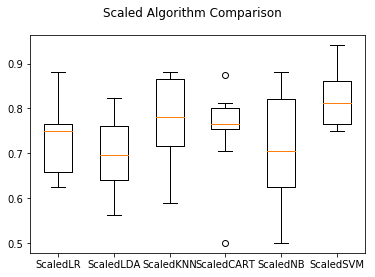

In [32]:
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 4. Improve Accuracy

### a) Algorithm Tunning

#### 1) KNN Tunning

In [35]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830303 using {'n_neighbors': 1}
0.830303 (0.066015) with: {'n_neighbors': 1}
0.818182 (0.065977) with: {'n_neighbors': 3}
0.781818 (0.089757) with: {'n_neighbors': 5}
0.751515 (0.055027) with: {'n_neighbors': 7}
0.721212 (0.073553) with: {'n_neighbors': 9}
0.696970 (0.048779) with: {'n_neighbors': 11}
0.684848 (0.075451) with: {'n_neighbors': 13}
0.684848 (0.068159) with: {'n_neighbors': 15}
0.678788 (0.078620) with: {'n_neighbors': 17}
0.672727 (0.068407) with: {'n_neighbors': 19}
0.678788 (0.060708) with: {'n_neighbors': 21}


#### 2) SVM Tunning

In [37]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830303 using {'C': 1.5, 'kernel': 'rbf'}
0.757576 (0.045625) with: {'C': 0.1, 'kernel': 'linear'}
0.539394 (0.189070) with: {'C': 0.1, 'kernel': 'poly'}
0.533333 (0.097328) with: {'C': 0.1, 'kernel': 'rbf'}
0.660606 (0.100061) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.739394 (0.087924) with: {'C': 0.3, 'kernel': 'linear'}
0.636364 (0.155446) with: {'C': 0.3, 'kernel': 'poly'}
0.751515 (0.071727) with: {'C': 0.3, 'kernel': 'rbf'}
0.709091 (0.101886) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.703030 (0.103846) with: {'C': 0.5, 'kernel': 'linear'}
0.672727 (0.164063) with: {'C': 0.5, 'kernel': 'poly'}
0.787879 (0.062552) with: {'C': 0.5, 'kernel': 'rbf'}
0.715152 (0.108311) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.721212 (0.099442) with: {'C': 0.7, 'kernel': 'linear'}
0.709091 (0.140575) with: {'C': 0.7, 'kernel': 'poly'}
0.793939 (0.059960) with: {'C': 0.7, 'kernel': 'rbf'}
0.715152 (0.112845) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.709091 (0.095800) with: {'C': 0.9, 'kernel': 'linear'

### b) Ensembles

In [40]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.758088 (0.079819)
GBM: 0.782721 (0.122217)
RF: 0.734559 (0.086045)
ET: 0.811397 (0.119619)


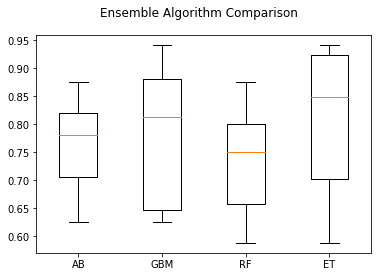

In [41]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## 5. Finalize Model

### a) Predictions on Validation Dataset

In [44]:
# Prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, y_train)

# Estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print("")
print(confusion_matrix(y_validation, predictions))
print("")
print(classification_report(y_validation, predictions))

0.9285714285714286

[[24  2]
 [ 1 15]]

             precision    recall  f1-score   support

          M       0.96      0.92      0.94        26
          R       0.88      0.94      0.91        16

avg / total       0.93      0.93      0.93        42

